Linear Minimum Mean Square Error (LMMSE) equalization is a technique used in signal processing and communications to mitigate the effects of channel distortions such as noise and interference, thus improving the quality of received signals. The LMMSE approach aims to minimize the mean square error between the transmitted and estimated signals.

Here's a Julia example that demonstrates LMMSE equalization for a simple scenario:

### Example Overview:
1. **Generate Synthetic Data**: We'll create a transmitted signal and simulate its passage through a noisy channel.
2. **Define the LMMSE Equalizer**: We'll set up the LMMSE equalizer based on the channel and noise characteristics.
3. **Apply LMMSE Equalization**: We'll apply the equalizer to the received signal to estimate the transmitted signal.

### Prerequisites:
Make sure you have Julia installed and ready. This example uses basic Julia functionalities and the `LinearAlgebra` package for matrix operations.



In [1]:
# Import necessary packages
using LinearAlgebra
using DSP
using ToeplitzMatrices
using Plots
using FFTW

In [2]:
include("operations.jl")

norm (generic function with 17 methods)

In [8]:
# Simulate the channel effect by convolving in time-domain
function apply_channel(signal, channel)
    return (signal ⊗ channel)[1:length(signal)]  # Return only the first part to match input length
end

apply_channel (generic function with 1 method)

In [4]:
# Add noise to the channel output
function add_noise(S, V)
    v = √(V) * randn(length(S))
    return S + v
end

add_noise (generic function with 1 method)

In [5]:
# LMMSE Equalizer
function lmmse_equalizer(Y, channel, V)
    H  = Toeplitz([channel[1]; zeros(length(Y)-1)], channel)
    Hᵀ = (H)ᵀ
    Rₓᵧ = H
    Rᵧᵧ = H * Hᵀ + V * I
    Rₓᵧᵀ = (Rₓᵧ)ᵀ
    Wₗₘₘₛₑ = Rₓᵧᵀ / Rᵧᵧ
    return Wₗₘₘₛₑ * Y
end

lmmse_equalizer (generic function with 1 method)

In [6]:
# Define the transmitted signal
S = [1; -1; 1; 1]

# Define the channel model (a simple FIR filter)
h = [0.5, 1.0, 0.5]  # Channel coefficients

# Channel output and noisy received signal
channel_output = apply_channel(S, h)
V = 0.1 # noise variance
Y = add_noise(channel_output, V)


# Apply LMMSE equalization
Ŝ = lmmse_equalizer(S, h, V)

# Print outputs
println("Transmitted Signal: $S")
println("Received Signal: $Y")
println("Estimated Signal by LMMSE: $Ŝ")


Transmitted Signal: [1, -1, 1, 1]
Received Signal: [0.7516234967338714, 0.3217338580345883, -0.11415958689317932, 1.3534034619560833]
Estimated Signal by LMMSE: [1.7771303714493807, -0.15294974508375836, -0.18208302986161629]


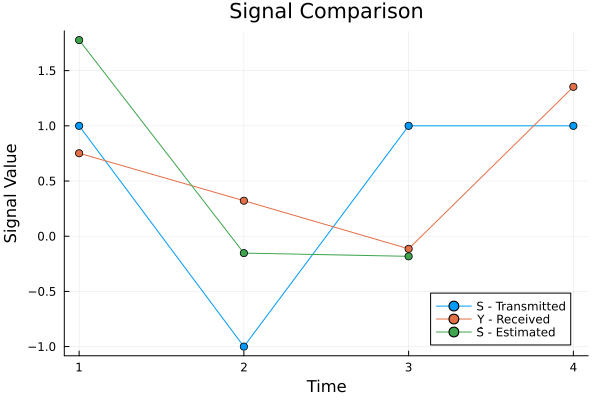

In [7]:
# Plotting results
plot(
    [S, Y, Ŝ]
    , label=["S - Transmitted" "Y - Received" "Ŝ - Estimated"]
    , title = "Signal Comparison"
    , xlabel = "Time", ylabel = "Signal Value"
    , marker=:circle
)

### Explanation:
- **Transmitted Signal**: This is the original signal that we intend to send.
- **Channel Model**: We assume a simple finite impulse response (FIR) channel with known coefficients $h$.
- **Received Signal**: This signal is the convolution of the transmitted signal with the channel, plus some additive Gaussian noise.
- **LMMSE Equalization**: We create a Toeplitz matrix from the channel coefficients to model the convolution operation. We then compute the covariance of the received signal ($R_{yy}$) and the cross-covariance between the transmitted and received signals ($R_{xy}$). The LMMSE filter $W_{lmmse}$ is calculated by solving the normal equations using these covariance matrices. This filter is then applied to the received signal to estimate the original transmitted signal.

This Julia example gives you a basic understanding of how LMMSE equalization can be implemented and used to mitigate the effects of channel distortions on transmitted signals.